In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sb

df = pd.read_csv(R"D:\python files\pandas exercise\loan\train.csv")

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Variable Identification<br><br></p>

In [5]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [39]:
df.shape

(614, 14)

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Univariate Analysis<br><br></p>

In [6]:
"""Here are a few inferences, you can draw by looking at the output of describe() function:

LoanAmount has (614 � 592) 22 missing values.
Loan_Amount_Term has (614 � 600) 14 missing values.
Credit_History has (614 � 564) 50 missing values.
"""
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [33]:
# this looks great
#this shows the count of non "nan" values
df[df.dtypes[df.dtypes == 'object'].index].describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001888,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [35]:
pd.Categorical(df['Property_Area']).describe()

,counts,freqs
categories,,
Rural,179,0.291531
Semiurban,233,0.379479
Urban,202,0.328990


In [38]:
pd.Categorical(df['Property_Area']).rename_categories(['R','SU','U']).describe()

,counts,freqs
categories,,
R,179,0.291531
SU,233,0.379479
U,202,0.328990


In [12]:
"""For the non-numerical values,we can look at frequency distribution to 
understand whether they make sense or not."""
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [36]:
pd.Categorical?

In [13]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

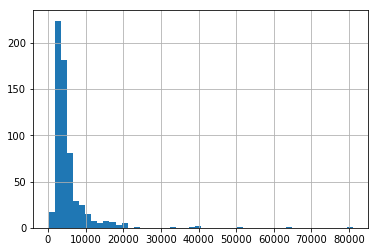

In [5]:
% matplotlib inline
df['ApplicantIncome'].hist(bins=50)

(array([ 533.,   59.,   15.,    0.,    4.,    0.,    1.,    1.,    0.,    1.]),
 array([   150.,   8235.,  16320.,  24405.,  32490.,  40575.,  48660.,
         56745.,  64830.,  72915.,  81000.]),
 <a list of 10 Patch objects>)

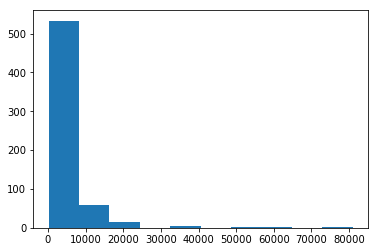

In [6]:
plt.hist(df['ApplicantIncome'].dropna())

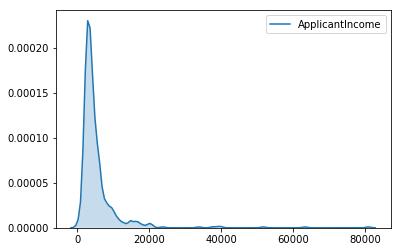

In [16]:
#It shows which values have higher probability
sns.kdeplot(df['ApplicantIncome'],shade=True)

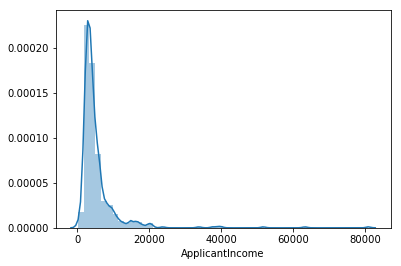

In [20]:
sns.distplot(df['ApplicantIncome'].dropna())

D:\algorithms\anaconda\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


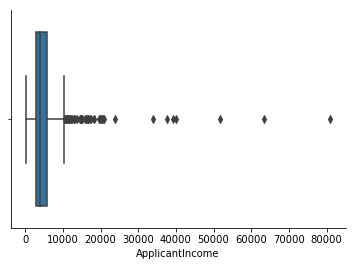

In [8]:
import seaborn as sns 
sns.boxplot(df['ApplicantIncome']) 
sns.despine()

D:\algorithms\anaconda\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


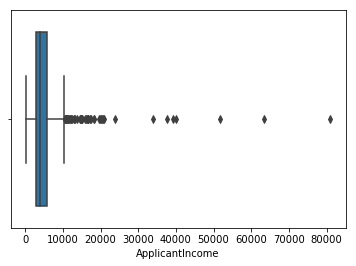

In [15]:
import seaborn as sns
sns.boxplot(df['ApplicantIncome'].dropna()) 


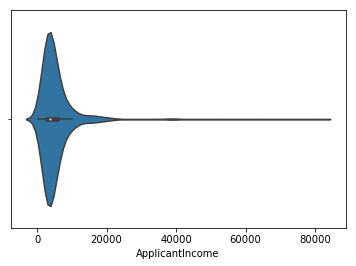

In [34]:
sns.violinplot(df['ApplicantIncome'])

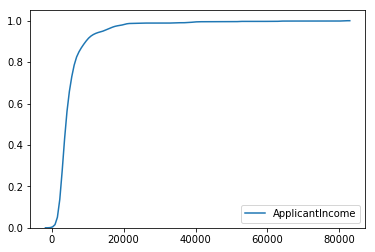

In [37]:
sns.kdeplot(df['ApplicantIncome'].dropna(),cumulative=True)

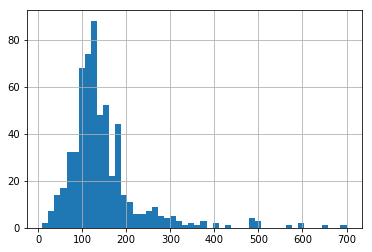

In [9]:
df['LoanAmount'].hist(bins=50)

(array([  72.,  310.,  143.,   33.,   15.,    6.,    5.,    3.,    3.,    2.]),
 array([   9. ,   78.1,  147.2,  216.3,  285.4,  354.5,  423.6,  492.7,
         561.8,  630.9,  700. ]),
 <a list of 10 Patch objects>)

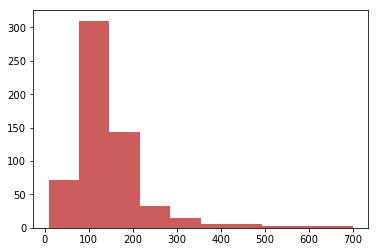

In [13]:
plt.hist(df['LoanAmount'].dropna(),color=sb.desaturate('indianred',1))

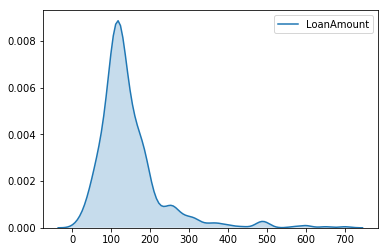

In [19]:
sns.kdeplot(df['LoanAmount'].dropna(),shade=True)

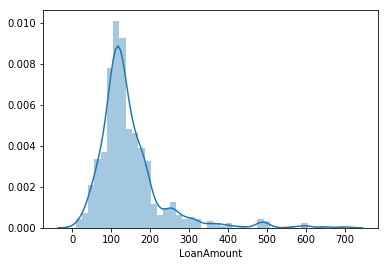

In [21]:
sns.distplot(df['LoanAmount'].dropna())

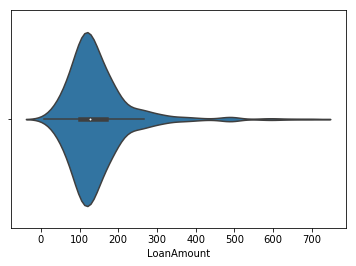

In [33]:
sns.violinplot(df['LoanAmount'])

In [11]:
print df['LoanAmount'].dropna().shape
print df['LoanAmount'].shape


(592,)
(614,)


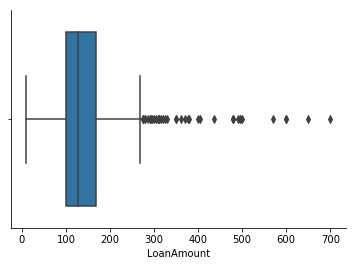

In [17]:
import seaborn as sns 
sns.boxplot(df['LoanAmount'].dropna()) 
sns.despine()

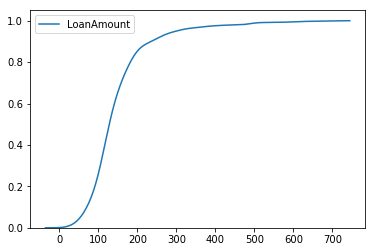

In [36]:
sns.kdeplot(df['LoanAmount'].dropna(),cumulative=True)

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Bivariate and Multivariate Analysis<br><br></p>

In [23]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
loan_approval        614 non-null int64
dtypes: float64(4), int64(2), object(8)
memory usage: 48.0+ KB


In [24]:
df['loan_approval'] = df.Loan_Status.map({'Y':1,'N':0})

In [25]:
from scipy.stats import chisquare,spearmanr
spearman_coefficient,p_value = spearmanr(df.Credit_History,df.loan_approval)
print spearman_coefficient,p_value

nan nan


In [27]:
 pd.crosstab(df.Credit_History,df.loan_approval)

loan_approval,0,1
Credit_History,,
0.0,82,7
1.0,97,378


In [328]:
 pd.crosstab(df.Credit_History,df.Education)

Education,Graduate,Not Graduate
Credit_History,,
0.0,63,26
1.0,417,108


In [30]:
pd.crosstab(df['Property_Area'],df['loan_approval'],normalize=0)

loan_approval,0,1
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


In [31]:
pd.crosstab(df['Credit_History'],df['loan_approval'])

loan_approval,0,1
Credit_History,,
0.0,82,7
1.0,97,378


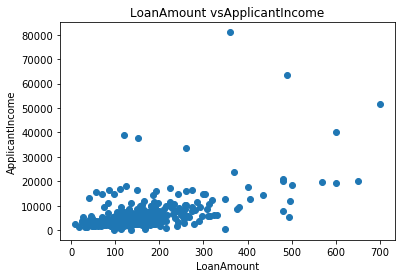

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['LoanAmount'],df['ApplicantIncome'])
plt.xlabel('LoanAmount')
plt.ylabel('ApplicantIncome')
plt.title('LoanAmount vsApplicantIncome' )


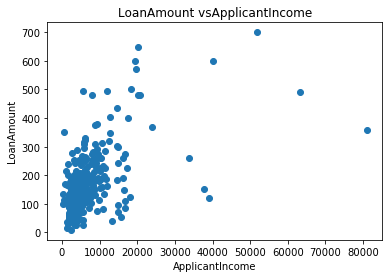

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['ApplicantIncome'],df['LoanAmount'])
plt.ylabel('LoanAmount')
plt.xlabel('ApplicantIncome')
plt.title('LoanAmount vsApplicantIncome' )


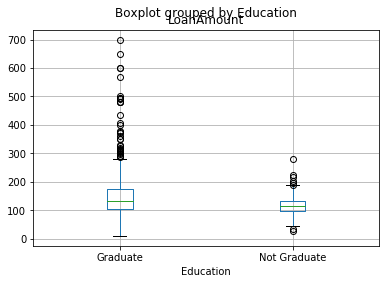

In [30]:
df.boxplot(column = 'LoanAmount',by = 'Education')

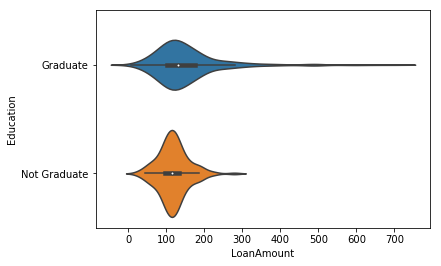

In [32]:
sns.violinplot(df['LoanAmount'],df['Education'])

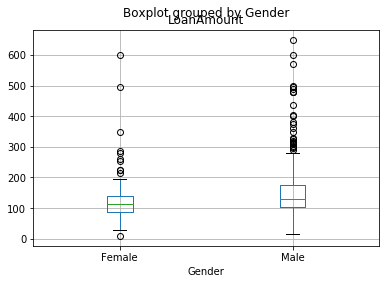

In [31]:
df.boxplot(column = 'LoanAmount',by = 'Gender')

In [24]:
df.boxplot?

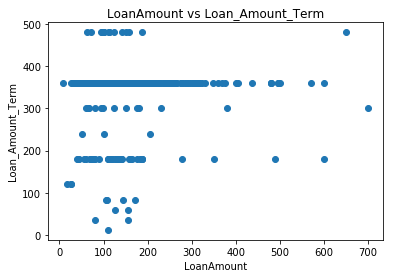

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(df['LoanAmount'],df['Loan_Amount_Term'])
plt.xlabel('LoanAmount')
plt.ylabel('Loan_Amount_Term')
plt.title('LoanAmount vs Loan_Amount_Term')


In [40]:
trans = df.pivot_table(index= 'Gender', columns='Education', values='Credit_History',aggfunc=len) 
trans

Education,Graduate,Not Graduate
Gender,,
Female,92.0,20.0
Male,376.0,113.0


In [42]:
trans = df.pivot_table(index= 'Gender', columns='Education', values='Credit_History',aggfunc=sum) 
trans

Education,Graduate,Not Graduate
Gender,,
Female,69.0,15.0
Male,302.0,80.0


In [47]:
pd.crosstab(df['Gender'],df['Education'],margins=True)

Education,Graduate,Not Graduate,All
Gender,,,
Female,92,20,112
Male,376,113,489
All,468,133,601


In [54]:
trans = df.pivot_table(index= 'Gender', columns='Education', values='LoanAmount',aggfunc=np.sum) 
trans

Education,Graduate,Not Graduate
Gender,,
Female,11687.0,2123.0
Male,57352.0,12803.0


In [62]:
print 11687.0/90
print 2123/19.0

129.855555556
111.736842105


In [49]:
trans = df.pivot_table(index= 'Gender', columns='Education', values='LoanAmount') 
trans

Education,Graduate,Not Graduate
Gender,,
Female,129.855556,111.736842
Male,157.994490,119.654206


In [234]:
df[['Gender','Credit_History']].groupby('Gender').count()

,Credit_History
Gender,
Female,101
Male,451


In [253]:
df[['Self_Employed','Credit_History']].groupby('Self_Employed').count()

,Credit_History
Self_Employed,
No,463
Yes,75


In [41]:
df[['Self_Employed','Credit_History']].groupby('Self_Employed').mean()

,Credit_History
Self_Employed,
No,0.835853
Yes,0.840000


In [257]:
pd.crosstab(df['Gender'],df['Credit_History'])

Credit_History,0.0,1.0
Gender,,
Female,17,84
Male,69,382


In [258]:
df['loan_approval'] = df.Loan_Status.map({'Y':1,'N':0})

In [259]:
df.pivot_table(index= 'Property_Area', columns='Gender', values='loan_approval') 

Gender,Female,Male
Property_Area,,
Rural,0.583333,0.622517
Semiurban,0.763636,0.773256
Urban,0.575758,0.674699


In [260]:
df.pivot_table(index= 'Property_Area', columns='Gender', values='LoanAmount',aggfunc=np.sum)

Gender,Female,Male
Property_Area,,
Rural,2929.0,22603.0
Semiurban,7168.0,25083.0
Urban,3713.0,22469.0


In [261]:
test = df.groupby(['Gender'])
test.describe()

ApplicantIncome  CoapplicantIncome  Credit_History  LoanAmount  \
Gender                                                                         
Female count       112.000000         112.000000      101.000000  109.000000   
       mean       4643.473214        1108.008929        0.831683  126.697248   
       std        3585.381488        4094.595514        0.376013   79.286460   
       min         210.000000           0.000000        0.000000    9.000000   
       25%        2661.500000           0.000000        1.000000   88.000000   
       50%        3583.000000           0.000000        1.000000  113.000000   
       75%        4606.500000        1635.000000        1.000000  138.000000   
       max       19484.000000       41667.000000        1.000000  600.000000   
Male   count       489.000000         489.000000      451.000000  470.000000   
       mean       5446.460123        1742.932352        0.847007  149.265957   
       std        6185.789262        2606.507054        0.360381   82.810851   
       min         150.000000           0.000000        0.000000   17.000000   
       25%        2917.000000           0.000000        1.000000  104.000000   
       50%        3865.000000        1430.000000        1.000000  130.000000   
       75%        5923.000000        2436.000000        1.000000  175.000000   
       max       81000.000000       33837.000000        1.000000  650.000000   

              Loan_Amount_Term  loan_approval  
Gender                                         
Female count        109.000000     112.000000  
       mean         352.293578       0.669643  
       std           56.722081       0.472456  
       min           36.000000       0.000000  
       25%          360.000000       0.000000  
       50%          360.000000       1.000000  
       75%          360.000000       1.000000  
       max          480.000000       1.000000  
Male   count        478.000000     489.000000  
       mean         339.665272       0.693252  
       std           67.089140       0.461616  
       min           12.000000       0.000000  
       25%          360.000000       0.000000  
       50%          360.000000       1.000000  
       75%          360.000000       1.000000  
       max          480.000000       1.000000

In [262]:
test2 = df.groupby(['Education'])
test2.describe()

ApplicantIncome  CoapplicantIncome  Credit_History  \
Education                                                                
Graduate     count       480.000000         480.000000      443.000000   
             mean       5857.433333        1717.474833        0.857788   
             std        6739.797954        3230.965850        0.349663   
             min         150.000000           0.000000        0.000000   
             25%        2998.750000           0.000000        1.000000   
             50%        4000.000000        1059.000000        1.000000   
             75%        6068.750000        2337.000000        1.000000   
             max       81000.000000       41667.000000        1.000000   
Not Graduate count       134.000000         134.000000      121.000000   
             mean       3777.283582        1276.544776        0.785124   
             std        2237.081586        1310.343602        0.412444   
             min         210.000000           0.000000        0.000000   
             25%        2583.000000           0.000000        1.000000   
             50%        3357.500000        1356.500000        1.000000   
             75%        4333.000000        2028.250000        1.000000   
             max       18165.000000        7101.000000        1.000000   

                    LoanAmount  Loan_Amount_Term  loan_approval  
Education                                                        
Graduate     count  465.000000        472.000000     480.000000  
             mean   154.060215        344.669492       0.708333  
             std     92.883366         61.299661       0.455004  
             min      9.000000         12.000000       0.000000  
             25%    103.000000        360.000000       0.000000  
             50%    132.000000        360.000000       1.000000  
             75%    176.000000        360.000000       1.000000  
             max    700.000000        480.000000       1.000000  
Not Graduate count  127.000000        128.000000     134.000000  
             mean   118.409449        332.156250       0.611940  
             std     39.773636         77.079613       0.489137  
             min     25.000000         36.000000       0.000000  
             25%     96.500000        360.000000       0.000000  
             50%    115.000000        360.000000       1.000000  
             75%    133.000000        360.000000       1.000000  
             max    279.000000        480.000000       1.000000

In [263]:
test2.size()

Education
Graduate        480
Not Graduate    134
dtype: int64

In [264]:
test3 = df.groupby(['Self_Employed'])
test3.describe()

ApplicantIncome  CoapplicantIncome  Credit_History  \
Self_Employed                                                             
No            count       500.000000         500.000000      463.000000   
              mean       5049.748000        1580.989840        0.835853   
              std        5682.895810        2438.161181        0.370809   
              min         150.000000           0.000000        0.000000   
              25%        2824.500000           0.000000        1.000000   
              50%        3705.500000        1293.500000        1.000000   
              75%        5292.750000        2303.000000        1.000000   
              max       81000.000000       33837.000000        1.000000   
Yes           count        82.000000          82.000000       75.000000   
              mean       7380.817073        1501.341463        0.840000   
              std        5883.564795        2780.713676        0.369075   
              min         674.000000           0.000000        0.000000   
              25%        3452.250000           0.000000        1.000000   
              50%        5809.000000           0.000000        1.000000   
              75%        9348.500000        2164.500000        1.000000   
              max       39147.000000       20000.000000        1.000000   

                     LoanAmount  Loan_Amount_Term  loan_approval  
Self_Employed                                                     
No            count  482.000000        489.000000     500.000000  
              mean   141.748963        343.263804       0.686000  
              std     79.780919         64.696881       0.464581  
              min      9.000000         12.000000       0.000000  
              25%    100.000000        360.000000       0.000000  
              50%    125.000000        360.000000       1.000000  
              75%    161.750000        360.000000       1.000000  
              max    700.000000        480.000000       1.000000  
Yes           count   79.000000         80.000000      82.000000  
              mean   172.000000        336.300000       0.682927  
              std    108.634650         69.395290       0.468200  
              min     25.000000         60.000000       0.000000  
              25%    106.000000        360.000000       0.000000  
              50%    150.000000        360.000000       1.000000  
              75%    189.000000        360.000000       1.000000  
              max    650.000000        480.000000       1.000000

In [265]:
test4 = df.groupby(['Credit_History'])
test4.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
Credit_History                                                         
0.0            count        89.000000          89.000000   85.000000   
               mean       5679.438202        1542.179775  146.717647   
               std        9301.896041        2023.914617   85.164772   
               min        1500.000000           0.000000   45.000000   
               25%        2787.000000           0.000000  104.000000   
               50%        3547.000000        1330.000000  125.000000   
               75%        5285.000000        2254.000000  160.000000   
               max       81000.000000       11300.000000  600.000000   
1.0            count       475.000000         475.000000  458.000000   
               mean       5426.526316        1528.250358  144.786026   
               std        5535.393384        2548.728908   83.051842   
               min         150.000000           0.000000    9.000000   
               25%        2908.500000           0.000000  100.000000   
               50%        3859.000000        1040.000000  128.000000   
               75%        5820.000000        2241.000000  168.000000   
               max       63337.000000       33837.000000  700.000000   

                      Loan_Amount_Term  loan_approval  
Credit_History                                         
0.0            count         83.000000      89.000000  
               mean         341.927711       0.078652  
               std           66.744102       0.270720  
               min          180.000000       0.000000  
               25%          360.000000       0.000000  
               50%          360.000000       0.000000  
               75%          360.000000       0.000000  
               max          480.000000       1.000000  
1.0            count        467.000000     475.000000  
               mean         342.192719       0.795789  
               std           64.268660       0.403549  
               min           36.000000       0.000000  
               25%          360.000000       1.000000  
               50%          360.000000       1.000000  
               75%          360.000000       1.000000  
               max          480.000000       1.000000

In [266]:
test5 = df.groupby(['Loan_Status'])
test5.describe()

ApplicantIncome  CoapplicantIncome  Credit_History  \
Loan_Status                                                             
N           count       192.000000         192.000000      179.000000   
            mean       5446.078125        1877.807292        0.541899   
            std        6819.558528        4384.060103        0.499639   
            min         150.000000           0.000000        0.000000   
            25%        2885.000000           0.000000        0.000000   
            50%        3833.500000         268.000000        1.000000   
            75%        5861.250000        2273.750000        1.000000   
            max       81000.000000       41667.000000        1.000000   
Y           count       422.000000         422.000000      385.000000   
            mean       5384.068720        1504.516398        0.981818   
            std        5765.441615        1924.754855        0.133782   
            min         210.000000           0.000000        0.000000   
            25%        2877.500000           0.000000        1.000000   
            50%        3812.500000        1239.500000        1.000000   
            75%        5771.500000        2297.250000        1.000000   
            max       63337.000000       20000.000000        1.000000   

                   LoanAmount  Loan_Amount_Term  loan_approval  
Loan_Status                                                     
N           count  181.000000        186.000000          192.0  
            mean   151.220994        344.064516            0.0  
            std     85.862783         69.238921            0.0  
            min      9.000000         36.000000            0.0  
            25%    100.000000        360.000000            0.0  
            50%    129.000000        360.000000            0.0  
            75%    176.000000        360.000000            0.0  
            max    570.000000        480.000000            0.0  
Y           count  411.000000        414.000000          422.0  
            mean   144.294404        341.072464            1.0  
            std     85.484607         63.247770            0.0  
            min     17.000000         12.000000            1.0  
            25%    100.000000        360.000000            1.0  
            50%    126.000000        360.000000            1.0  
            75%    161.000000        360.000000            1.0  
            max    700.000000        480.000000            1.0

In [267]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loan_approval
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [268]:


s1 = df.sort_values(['ApplicantIncome'], ascending= False)
s1.iloc[ :10 , 4:7]


,Education,Self_Employed,ApplicantIncome
409,Graduate,No,81000
333,Graduate,NaN,63337
171,Graduate,No,51763
155,Graduate,No,39999
185,Graduate,Yes,39147
443,Graduate,No,37719
183,Graduate,No,33846
126,Graduate,No,23803
506,Graduate,No,20833
284,Graduate,No,20667


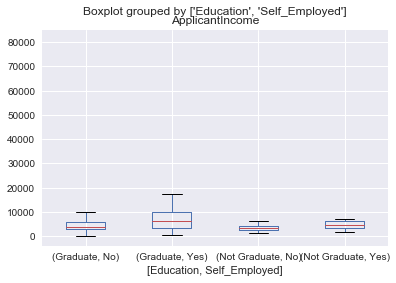

In [269]:
df.boxplot(column='ApplicantIncome', by = ['Education','Self_Employed'])

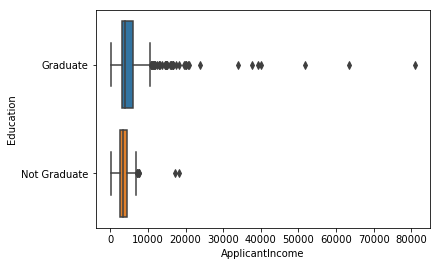

In [76]:
sns.boxplot(x = df['ApplicantIncome'], y = df['Education'])

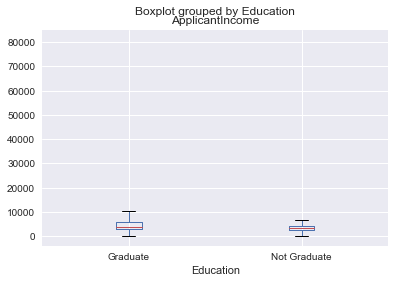

In [270]:
df.boxplot(column='ApplicantIncome', by = 'Education')

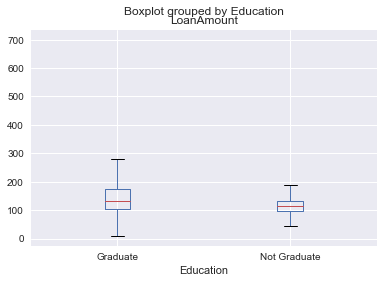

In [271]:
df.boxplot(column='LoanAmount',by = 'Education')

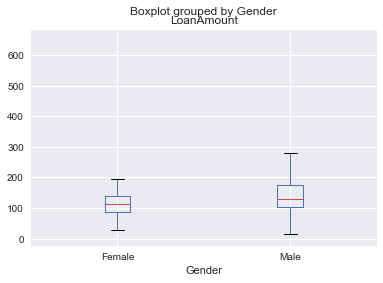

In [272]:
df.boxplot(column='LoanAmount',by = 'Gender')

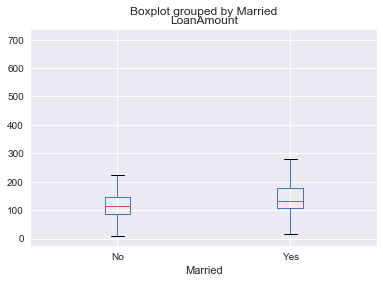

In [273]:
df.boxplot(column='LoanAmount',by = 'Married')

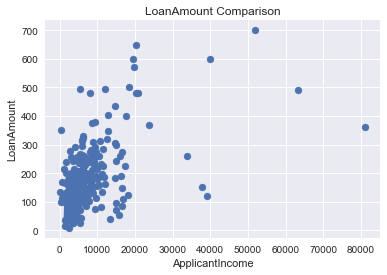

In [274]:
#outliers
% matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
#variable
ax.scatter(df['ApplicantIncome'],df['LoanAmount'])
#labels and lit
plt.title('LoanAmount Comparison')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()


In [275]:
"""import numpy as np
df.Loan_Status = np.nan
df.dropna(axis = 1,how  = 'all',inplace = True)"""
df.drop(['Loan_Status'],axis = 1,inplace = True)

In [276]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_approval
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [278]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='loan_approval',index=['Credit_History'])
print 'Frequency Table for Credit History:' 
print temp1

print '\nProbility of getting loan for each Credit History class:' 
print temp2

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: loan_approval, dtype: float64


In [279]:
print round((7.0/(82 + 7)),6)
print round((378.0/(378+97)),6)

0.078652
0.795789


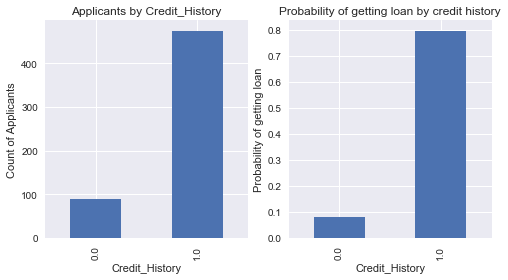

In [280]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

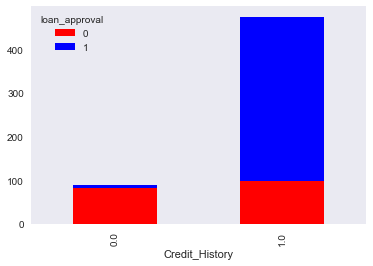

In [281]:
temp3 = pd.crosstab(df['Credit_History'], df['loan_approval'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

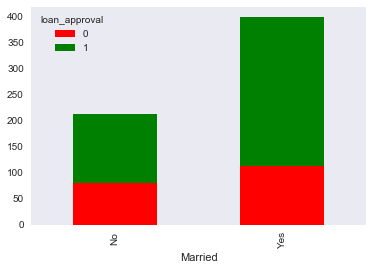

In [282]:
temp4 = pd.crosstab(df['Married'], df['loan_approval'])
temp4.plot(kind='bar', stacked=True, color=['red','green'], grid=False)

In [283]:
df.pivot_table(values='loan_approval',index=['Married'])

Married
No     0.629108
Yes    0.716080
Name: loan_approval, dtype: float64

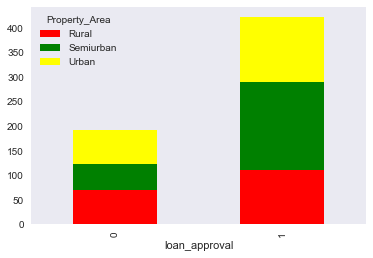

In [284]:
temp4 = pd.crosstab(df['loan_approval'],df['Property_Area'])
temp4.plot(kind='bar', stacked=True, color=['red','green','yellow'], grid=False)

In [285]:
df.pivot_table(values='loan_approval',index=['Property_Area'])

Property_Area
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
Name: loan_approval, dtype: float64

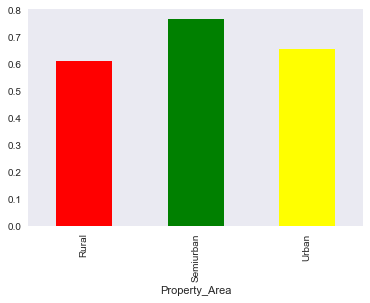

In [286]:
df.pivot_table(values='loan_approval',index=['Property_Area']).plot(kind='bar', stacked=True, color=['red','green','yellow'], grid=False)

In [287]:
df.pivot_table(values='loan_approval',index=['Property_Area','Gender'])

Property_Area  Gender
Rural          Female    0.583333
               Male      0.622517
Semiurban      Female    0.763636
               Male      0.773256
Urban          Female    0.575758
               Male      0.674699
Name: loan_approval, dtype: float64

In [288]:
df.pivot_table(values='loan_approval',index=['Property_Area','Gender','Credit_History'])

Property_Area  Gender  Credit_History
Rural          Female  0.0               0.000000
                       1.0               0.550000
               Male    0.0               0.076923
                       1.0               0.745614
Semiurban      Female  0.0               0.125000
                       1.0               0.860465
               Male    0.0               0.150000
                       1.0               0.879433
Urban          Female  0.0               0.000000
                       1.0               0.761905
               Male    0.0               0.043478
                       1.0               0.771654
Name: loan_approval, dtype: float64

In [289]:
df.pivot_table(values='loan_approval',index = ['Property_Area','Gender','Married','Credit_History'])

Property_Area  Gender  Married  Credit_History
Rural          Female  No       1.0               0.588235
                       Yes      0.0               0.000000
                                1.0               0.333333
               Male    No       0.0               0.125000
                                1.0               0.714286
                       Yes      0.0               0.055556
                                1.0               0.759494
Semiurban      Female  No       0.0               0.142857
                                1.0               0.769231
                       Yes      0.0               0.000000
                                1.0               1.000000
               Male    No       0.0               0.200000
                                1.0               0.833333
                       Yes      0.0               0.133333
                                1.0               0.894231
Urban          Female  No       0.0               0.000000
         

In [ ]:
df.pivot_table(values='loan_approval',index = ['Property_Area','Gender','Married','Credit_History'],aggfunc = np.length)

In [290]:
probability  = df.pivot_table(values='loan_approval',index = ['Property_Area','Gender','Married','Credit_History'])

In [ ]:
type(probability)

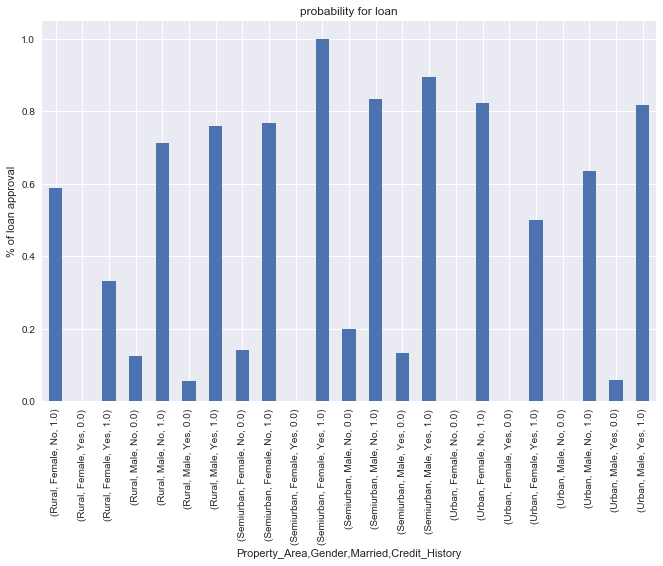

In [292]:
%matplotlib inline
import matplotlib.pyplot as plt
probability.plot(kind='bar', stacked=True, grid=True,figsize = (11,7))
plt.ylabel('% of loan approval')
plt.title("probability for loan")

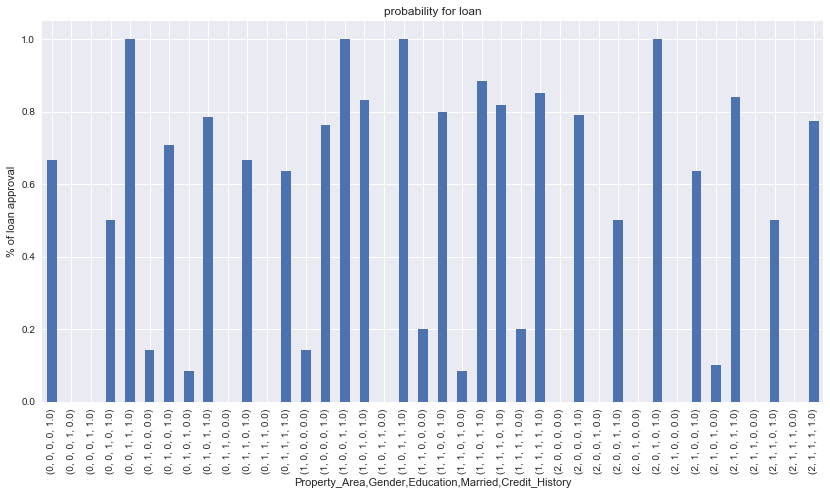

In [396]:
probability2  = df.pivot_table(values='loan_approval',index = ['Property_Area','Gender','Education','Married','Credit_History'])
probability2.plot(kind='bar', figsize=(14,7),stacked=True, grid=True)
plt.ylabel('% of loan approval')
plt.title("probability for loan")

In [295]:
probability2

Property_Area  Gender  Education     Married  Credit_History
Rural          Female  Graduate      No       1.0               0.615385
                                     Yes      0.0               0.000000
                                              1.0               0.000000
                       Not Graduate  No       1.0               0.500000
                                     Yes      1.0               1.000000
               Male    Graduate      No       0.0               0.142857
                                              1.0               0.739130
                                     Yes      0.0               0.083333
                                              1.0               0.800000
                       Not Graduate  No       0.0               0.000000
                                              1.0               0.666667
                                     Yes      0.0               0.000000
                                              1.0              

In [296]:
NGFL = df.loc[(df.Education.str.contains("Not Graduate")) & (df.Gender.str.contains("Female")) & (df.loan_approval == 1)]
NGFL.shape

(14, 13)

In [297]:
df.loc[: ,'ApplicantIncome':"LoanAmount"].apply(max,axis = 0)

ApplicantIncome      81000.0
CoapplicantIncome    41667.0
LoanAmount               NaN
dtype: float64

In [298]:
df.loc[: ,'ApplicantIncome':"LoanAmount"].apply(max,axis = 1)[:3]

0    5849.0
1    4583.0
2    3000.0
dtype: float64